In [1]:
!unzip Dataset1.zip

Archive:  Dataset1.zip
   creating: Dataset/fake/
  inflating: Dataset/fake/aagfhgtpmv_0.png  
  inflating: Dataset/fake/aagfhgtpmv_1.png  
  inflating: Dataset/fake/aagfhgtpmv_2.png  
  inflating: Dataset/fake/aagfhgtpmv_3.png  
  inflating: Dataset/fake/aagfhgtpmv_4.png  
  inflating: Dataset/fake/aagfhgtpmv_5.png  
  inflating: Dataset/fake/aagfhgtpmv_6.png  
  inflating: Dataset/fake/aagfhgtpmv_7.png  
  inflating: Dataset/fake/aagfhgtpmv_8.png  
  inflating: Dataset/fake/aagfhgtpmv_9.png  
  inflating: Dataset/fake/aapnvogymq_0.png  
  inflating: Dataset/fake/aapnvogymq_1.png  
  inflating: Dataset/fake/aapnvogymq_2.png  
  inflating: Dataset/fake/aapnvogymq_3.png  
  inflating: Dataset/fake/aapnvogymq_4.png  
  inflating: Dataset/fake/aapnvogymq_5.png  
  inflating: Dataset/fake/aapnvogymq_6.png  
  inflating: Dataset/fake/aapnvogymq_7.png  
  inflating: Dataset/fake/aapnvogymq_8.png  
  inflating: Dataset/fake/aapnvogymq_9.png  
  inflating: Dataset/fake/abqwwspghj_0.png  
  inf

CNN+MobilenetV2 Models

Found 1530 files belonging to 2 classes.
Using 1224 files for training.
Found 1530 files belonging to 2 classes.
Using 306 files for validation.
Detected Classes: ['fake', 'real']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool                 │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.5005 - loss: 0.7902 - val_accuracy: 0.6928 - val_loss: 0.6189
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.6650 - loss: 0.6160 - val_accuracy: 0.7190 - val_loss: 0.5853
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.7030 - loss: 0.5814 - val_accuracy: 0.7647 - val_loss: 0.5401
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.7311 - loss: 0.5424 - val_accuracy: 0.7451 - val_loss: 0.5617
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.6987 - loss: 0.5781 - val_accuracy: 0.7647 - val_loss: 0.5440
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7432 - loss: 0.5238 - val_accuracy: 0.7745 - val_loss: 0.5045
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7304 - loss: 0.5145 - val_accuracy: 0.7647 - val_loss: 0.5094
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.7344 - loss: 0.5050 - val_accuracy: 0.7810 - val_

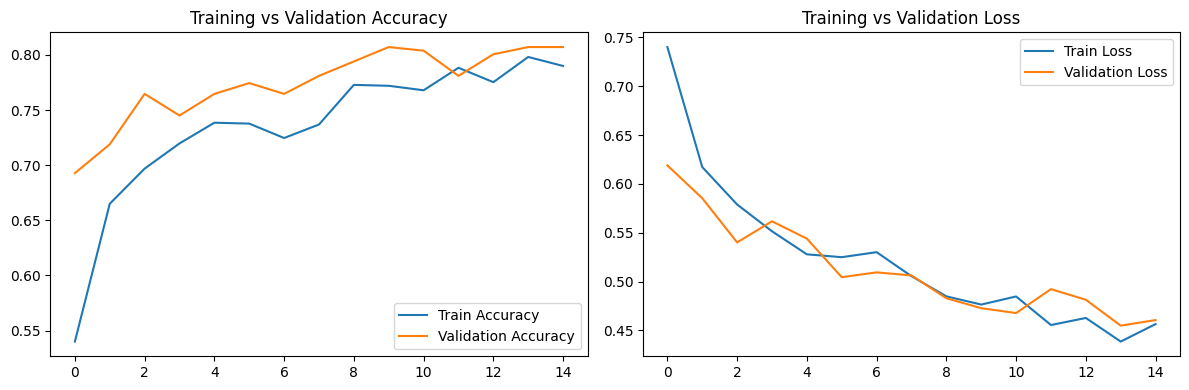

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# === Configuration Settings ===
BATCH_SIZE = 32
IMAGE_SHAPE = (224, 224)
DATA_PATH = "Dataset"
EPOCH_COUNT = 15

# === Step 1: Load and Split Dataset ===
# Using built-in utility to load dataset and create training/validation splits
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_PATH,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_PATH,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

print("Detected Classes:", train_dataset.class_names)

# === Step 2: Normalize Images & Optimize Data Pipeline ===
# Scaling pixel values and improving performance with caching and prefetching
scaler = layers.Rescaling(1.0 / 255)
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.map(lambda x, y: (scaler(x), y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.map(lambda x, y: (scaler(x), y)).cache().prefetch(buffer_size=AUTOTUNE)

# === Step 3: Define Augmentation Pipeline ===
# Random transformations to improve generalization
augment_layer = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# === Step 4: Load and Freeze Base Model ===
# Using MobileNetV2 as the feature extractor
feature_extractor = MobileNetV2(
    input_shape=IMAGE_SHAPE + (3,),
    include_top=False,
    weights='imagenet'
)
feature_extractor.trainable = False  # Freeze weights for now

# === Step 5: Construct Custom Model on Top ===
input_layer = tf.keras.Input(shape=IMAGE_SHAPE + (3,))
augmented = augment_layer(input_layer)
features = feature_extractor(augmented, training=False)
pooled = layers.GlobalAveragePooling2D(name="global_avg_pool")(features)
dropped = layers.Dropout(0.3)(pooled)
output_layer = layers.Dense(1, activation='sigmoid')(dropped)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# === Step 6: Compile the Model ===
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# === Step 7: Setup Training Callbacks ===
# EarlyStopping helps avoid overfitting, ModelCheckpoint saves best model
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", save_best_only=True)
]

# === Step 8: Train the Model ===
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCH_COUNT,
    callbacks=callbacks_list
)

# === Step 9: Final Evaluation ===
final_loss, final_acc = model.evaluate(val_dataset)
print(f"Final Validation Accuracy: {final_acc:.2f}")

# === Step 10: Plot Training History ===
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
model.save("mobilenetv2_fakeface_model.keras")

In [13]:
import tensorflow as tf
import numpy as np
import cv2

def classify_image(image_path, model_file="mobilenetv2_fakeface_model.keras"):
    # Step 1: Load the trained model from file
    try:
        model = tf.keras.models.load_model(model_file)
    except Exception as e:
        print(f"Failed to load model: {e}")
        return

    # Step 2: Read and prepare the image
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Couldn't load the image. Check the path.")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (224, 224))           # Resize to match model input
    img = img.astype("float32") / 255.0         # Normalize pixel values
    img = np.expand_dims(img, axis=0)           # Add batch dimension

    # Step 3: Run prediction
    prediction = model.predict(img)[0][0]
    print(f"Model output: {prediction:.4f}")

    # Step 4: Interpret the result
    label = "Real" if prediction >= 0.5 else "Fake"
    confidence = prediction if prediction >= 0.5 else 1 - prediction

    print(f"Predicted: {label} ({confidence * 100:.2f}% confidence)")


In [14]:
classify_image('/content/Dataset/fake/aagfhgtpmv_6.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Model output: 0.0647
Predicted: Fake (93.53% confidence)
